### How do we describe qubits?
A qubit is a unit other than what we are used to. It differs from an ordinary bit in that it has no fixed value, but according to the rules of quantum mechanics, it is in an intermediate state, called superposition, between 0 and 1 (like Schrödinger's cat). Instead of selecting a value of 0 or 1, there is a probability of both being in the state of both variables. Only when measuring, the qubit can assume one of these two values. 

One way to represent this with mathematics is to use two orthogonal vectors.
$$
|0⟩= 
\begin{bmatrix}
1  \\
0  \\
\end{bmatrix}
$$
$$
|1⟩= 
\begin{bmatrix}
0  \\
1  \\
\end{bmatrix}
$$

Another way to represent the state of a qubit $|q⟩$ is this pattern: $$|q⟩=α|0⟩+β|1⟩,$$

where α and β are probability amplitudes and can in general both be complex numbers. 

Let's unpack the weird  |  and  ⟩ . Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled  0  and  1. If you are not familiar with vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules. If you want to learn more about vectors and qubits, please visit the [official Qiskit website](https://qiskit.org/textbook/ch-states/representing-qubit-states.html).

### About Bloch Sphere...
In quantum mechanics and computer science, the Bloch sphere is, to a great extent, a geometric representation of a qubit. We can generate a model of the sphere with a simple qiskit command.  Everything is based on the formula: 
$$
|q⟩=cos \frac{θ}{2} |0⟩ + e^{iϕ}sin\frac{θ}{2}|1⟩
$$

At first glance, this mathematical formula is quite difficult to understand. [This](https://qiskit.org/textbook/ch-states/representing-qubit-states.html#3.1-Describing-the-Restricted-Qubit-State-) page shows how it was derived. If we interpret θ and ϕ as spherical coordinates (r = 1, since the magnitude of the qubit state is 1), we can plot any qubit state on the surface of a sphere, known as the Bloch sphere.

In the command below, in square brackets we write the following values (cartesian variables are in brackets): Theta - (x), Phi - (y), Radius - (z). The following calculations are made on the values:
$$
x = r * sin(a) * cos(b)
$$
$$
y = r * sin(a) * sin(b)
$$
$$
z = r * cos(a)
$$

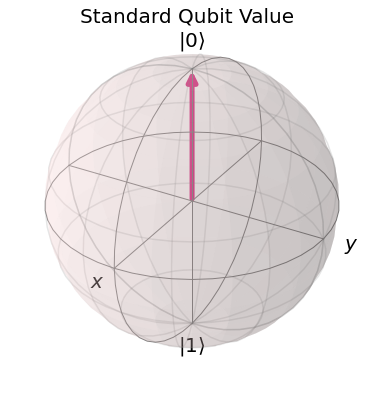

In [1]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline
plot_bloch_vector([0,0,1], title="Standard Qubit Value")

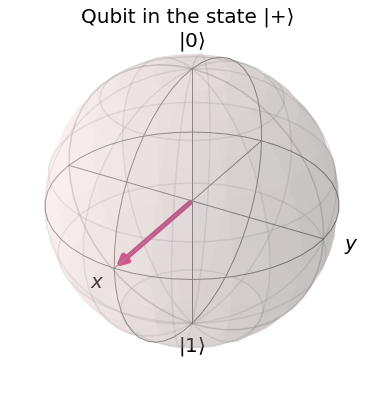

In [2]:
plot_bloch_vector([1,0,0], title="Qubit in the state |+⟩")

To create a Bloch sphere we need an array of three elements: (x, y, z) (cartesian) or (r, theta, phi) (spherical in radians).

### Single qubit gates as matrices
So far, you can see that everything is based on mathematical formulas. It is no different with qubit gates. The operation of such a gate is based on the use of a matrix. In the case of one-qubit gates these are 2x2 matrixes. The one-qubit gates discussed earlier are shown below:

### NOT Gate
This matrix gate looks like this:
$$
X|0⟩= 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
$$
To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. (If you don't know how to multiply matrices, click [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html)):
$$ X|0⟩= 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}=
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
 = X|1⟩
$$
Below we will introduce qubit on a Bloch sphere using Qiskit. At the beginning we have to implement the necessary libraries:

In [3]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

We do the same as in the previous section, but instead of drawing our qubit, we will immediately generate it on the Bloch sphere.

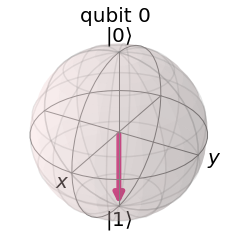

In [4]:
qcA = QuantumCircuit(1)
qcA.x(0)
backend = Aer.get_backend('statevector_simulator')
out = execute(qcA,backend).result().get_statevector()
plot_bloch_multivector(out)

### Hadamard Gate
This matrix is little more complicated::
$$
H={\frac{1}{\sqrt{2}}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$
We can see that this performs the transformations below:
$$
H|0⟩=|+⟩
$$
$$
H|1⟩=|-⟩
$$
You've probably noticed the plus and minus. We call these the “ket plus” and “ket minus” states, and write them |+⟩ and |-⟩. They are orthogonal to each other, but not to the |0⟩ and |1⟩ states. If we plot these on the Bloch sphere, each orthogonal pair is two opposite points. The |0⟩/|1⟩ pair defines the Z axis and the |+⟩/|-⟩ pair defines the X axis.

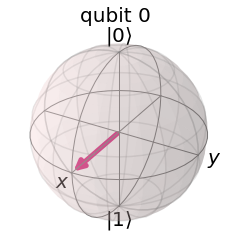

In [5]:
qcB = QuantumCircuit(1)
qcB.h(0)
backend = Aer.get_backend('statevector_simulator')
out = execute(qcB,backend).result().get_statevector()
plot_bloch_multivector(out)

The way these gates are applied is to multiply them by the Qbits’ vector. They are described at 180-degree rotations around the X,Y,Z axis of the Bloch sphere. As you can see, in this case a 90 degree rotation took place as the probability of each value is 50/50.